In [35]:
# Check if there are any duplicate characters in a string, and print them out
def check_duplicates(s):
    duplicates = []
    duplicates_count = 0
    for i in s:
        if s.count(i) > 1:
            duplicates.append(i)
            duplicates_count += s.count(i)-1
    print('String length: ', len(s))
    print('Duplicated chars: ', duplicates)
    print('Duplicates count: ', duplicates_count)

# A function that read the first character of each line in a file and store it in a string
def read_first_char(file):
    with open(file, 'r') as f:
        return ''.join([line[0] for line in f])

# A function that read the first word of each line in a file and store it in a list
def read_first_word(file):
    with open(file, 'r') as f:
        return [line.split()[0] for line in f]

# Read a file and store the contents in a list without the newline characters
def read_lines(file):
    with open(file, 'r') as f:
        return [line.strip() for line in f]

# Read a file and store the contents in a string
def read_file(file):
    with open(file, 'r') as f:
        return f.read()

# Store a string in a file
def write_file(s, file):
    with open(file, 'w') as f:
        f.write(s)

# Store a list of strings in a file
def write_lines(lines, file):
    with open(file, 'w') as f:
        for line in lines:
            f.write(line + '\n')

# Remove duplicates from a string
def remove_duplicates(s):
    output = ''
    for i in s:
        if i not in output:
            output += i
    return output

In [30]:
character_source = '../data/source/CCL6kT.txt'
character_list = []
with open(character_source, "r", encoding='UTF-8') as file:
    # Read all characters at once
    characters = file.read()
    # Convert the string to a list of characters
    character_list = list(characters)

In [22]:
word_list = read_lines('../data/source/words.txt')

In [31]:
# remove words that contain characters that are not in the character list
filtered_word_list = []
for word in word_list:
    if all(char in character_list for char in word):
        filtered_word_list.append(word)

In [36]:
write_lines(filtered_word_list, '../data/source/word_list.txt')

In [25]:
string = read_file('../data/source/CCL6kT.txt')
#string = read_first_char('source/CCL6kS.txt')
check_duplicates(string)

String length:  6000
Duplicated chars:  []
Duplicates count:  0


In [22]:
string = remove_duplicates(string)
check_duplicates(string)

String length:  6000
Duplicated chars:  []
Duplicates count:  0


In [1]:
import numpy as np
icons = np.load('../data/source/Icons-50.npy', allow_pickle=True).item()
icons['image'].shape

(10000, 3, 32, 32)

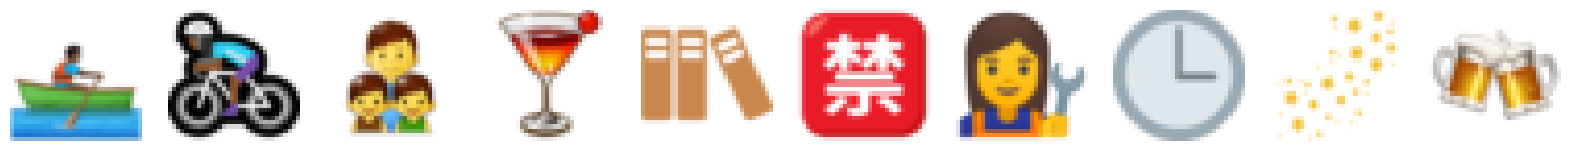

In [13]:
# plot the first 10 images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
    ax[i].imshow(icons['image'][i].transpose((1, 2, 0)))
    ax[i].axis('off')
plt.show()

In [1]:
# Sort a csv file based on the first column
import pandas as pd

def sort_csv(file):
    df = pd.read_csv(file)
    df = df.sort_values(by=df.columns[0])
    df.to_csv(file, index=False)

sort_csv('../output/confidence.csv')

In [4]:
# Check if the first column of a csv file contains all the values in the first column of another csv file
import csv

def check_csv(file1, file2):
    with open(file1, 'r') as f1, open(file2, 'r') as f2:
        reader1 = csv.reader(f1)
        reader2 = csv.reader(f2)
        
        column1 = [row[0] for row in reader1]
        column2 = [row[0] for row in reader2]

        for value in column1:
            if value not in column2:
                print(f'{value} not found in {file2}')

check_csv('../target/data_raw.csv', '../target/data.csv')

2608_00闕疑 not found in ../target/data.csv
1701_00闕疑 not found in ../target/data.csv
1701_00闕疑 not found in ../target/data.csv
1910_1910 not found in ../target/data.csv
1912_00闕疑 not found in ../target/data.csv
1912_00闕疑 not found in ../target/data.csv
1703_00闕疑 not found in ../target/data.csv
2306_0000 not found in ../target/data.csv
2302_0162 not found in ../target/data.csv
2302_0163 not found in ../target/data.csv
1712_00闕疑 not found in ../target/data.csv
1712_00闕疑 not found in ../target/data.csv
1706_0163 not found in ../target/data.csv
1706_0164 not found in ../target/data.csv
1903_0157 not found in ../target/data.csv
2301_0345 not found in ../target/data.csv
2301_0346 not found in ../target/data.csv
1705_00闕疑 not found in ../target/data.csv
1705_00闕疑 not found in ../target/data.csv
1901_00闕疑 not found in ../target/data.csv
1901_00闕疑 not found in ../target/data.csv
1704_00闕疑 not found in ../target/data.csv
1704_00闕疑 not found in ../target/data.csv
1704_00闕疑 not found in ../target/d

In [ ]:
# Append information to each filename in a directory, based on a csv file
import os
import csv

def append_info(directory, file):
    with open(file, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            filename = row[0] + '.txt'
            type = row[1]
            title = row[2]
            if os.path.exists(directory + filename):
                os.rename(directory + filename, directory + row[0] + f'_{type}_{title}.txt')
                print(f'{filename} renamed to {row[0]}_{type}_{title}.txt')

append_info('../output/0.9/', '../target/data.csv')

In [8]:
# Combine text files in a directory into a single text file, in the format of filename: content
import os

def combine_files(directory, output):
    with open(output, 'w', encoding='utf-8') as f:
        filenames = os.listdir(directory)
        filenames.sort()
        for filename in filenames:
            with open(directory + filename, 'r') as file:
                try:
                    f.write(f'{filename}: {file.read()}\n')
                except:
                    print(f'Error reading {filename}')
                print(f'{filename} combined')

combine_files('../output/docs/0.9/', '../output/combined.txt')

Error reading .DS_Store
.DS_Store combined
1501_0048_論說_論泥古之非.txt combined
1501_0065_學藝_日用理化學淺話.txt combined
1501_0066_學藝_日用理化學淺話.txt combined
1501_0067_學藝_日用理化學淺話.txt combined
1501_0068_學藝_日用理化學淺話.txt combined
1501_0069_學藝_日用理化學淺話.txt combined
1501_0072_學藝_化妝品製造法略說.txt combined
1501_0079_家政_婦女衛生談.txt combined
1501_0082_家政_婦女衛生談.txt combined
1501_0083_家政_婦女衛生談.txt combined
1501_0084_家政_婦女衛生談.txt combined
1501_0085_家政_婦女衛生談.txt combined
1501_0086_家政_婦女衛生談.txt combined
1501_0088_家政_女子發育時代之運動(附圖).txt combined
1501_0091_家政_女子發育時代之運動(附圖).txt combined
1501_0101_名著_女世說(卷一).txt combined
1501_0121_小說_德皇之偵探(一名偵探之偵探).txt combined
1501_0122_小說_德皇之偵探(一名偵探之偵探).txt combined
1501_0123_小說_德皇之偵探(一名偵探之偵探).txt combined
1501_0127_譯海_原口氏之女子參政論.txt combined
1501_0129_譯海_原口氏之女子參政論.txt combined
1501_0130_譯海_歐洲風雲中之東鱗西爪.txt combined
1501_0133_譯海_歐洲風雲中之東鱗西爪.txt combined
1501_0134_譯海_英國女子之經商實驗談.txt combined
1501_0135_譯海_家庭新智識.txt combined
1501_0136_譯海_家庭新智識.txt combined
1501_0184_紀載_黑龍江省立女子教養院文告章程一束.txt combined
1

In [7]:
import os
import json

def convert_json_to_txt(directory):
    filenames = os.listdir(directory)
    for filename in filenames:
        if filename.endswith('.json'):
            with open(directory + filename, 'r') as f:
                data = json.load(f)
                output = []
                for region in data['regions']:
                    x_min = min(region['points']['x'])
                    x_max = max(region['points']['x'])
                    y_min = min(region['points']['y'])
                    y_max = max(region['points']['y'])
                    class_label = region['class'] + 1
                    output.append((x_min, y_min, x_max, y_max, class_label))
                with open(directory + filename.replace('.json', '.txt'), 'w') as file:
                    # write in the format of x_min, y_min, x_max, y_max, class_label
                    for line in output:
                        file.write(f'{line[0]},{line[1]},{line[2]},{line[3]},{line[4]}\n')

convert_json_to_txt('../target/samples/positions/')